Importing Dependencies

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

## Data Collection and Analysis

In [110]:
insurance_dataset = pd.read_csv('insurance.csv')

In [111]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [112]:
insurance_dataset.shape

(1338, 7)

In [113]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [114]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data Analysis

In [115]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Distribution of age value

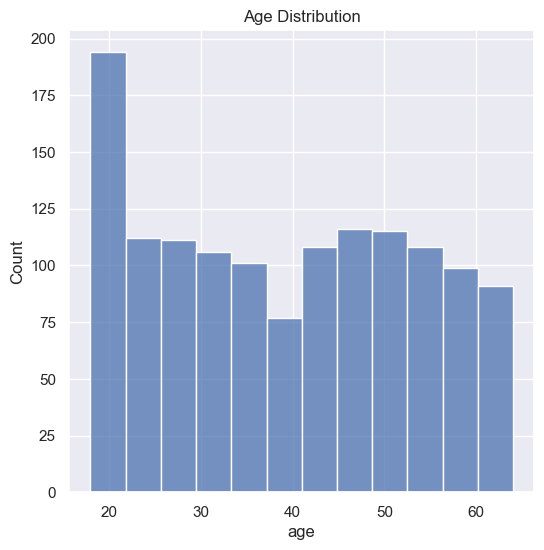

In [116]:
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

Distribution of Gender column

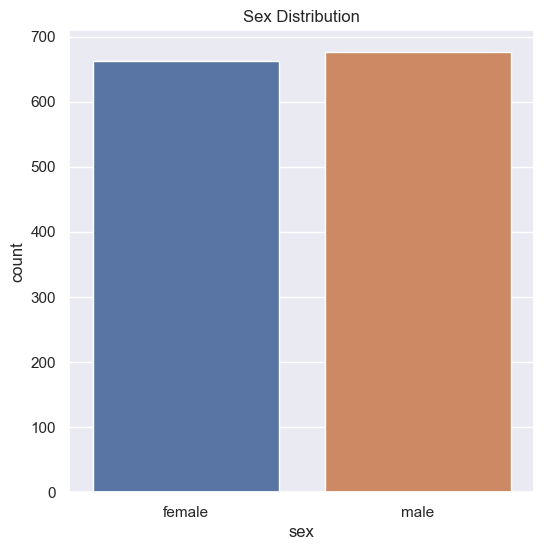

In [117]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data= insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [118]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

Distribution of BMI

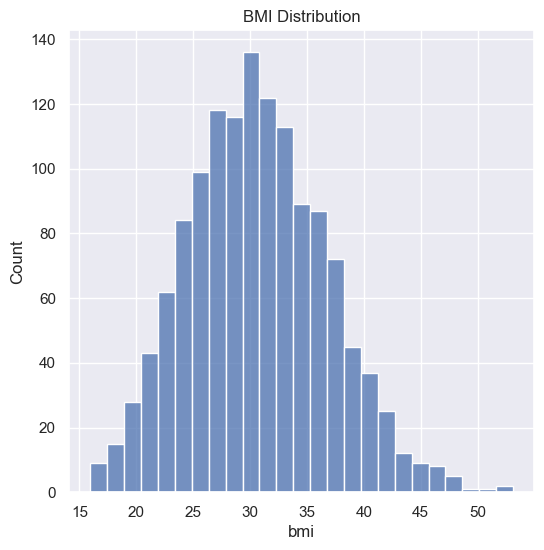

In [119]:
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

BMI = Weight in kg / (height in m)^2

1 feet= 0.305m, 1 inch= 0.0254m

Childeren Column

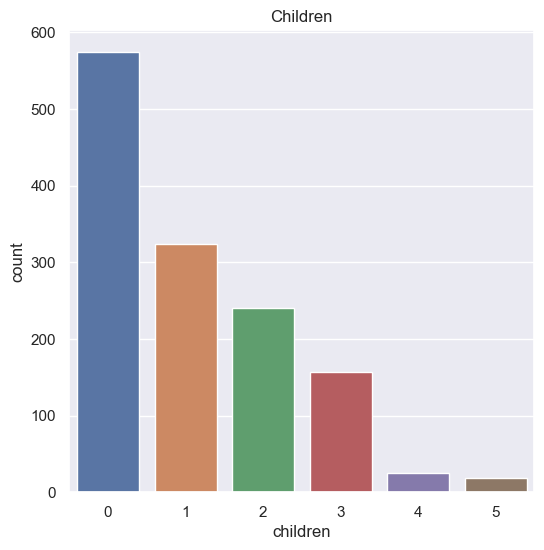

In [120]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data= insurance_dataset)
plt.title('Children')
plt.show()

In [121]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

Smoker column

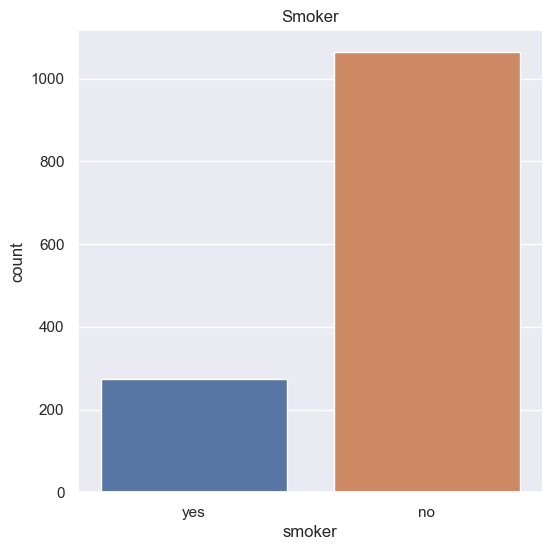

In [122]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data= insurance_dataset)
plt.title('Smoker')
plt.show()

In [123]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

Region Column

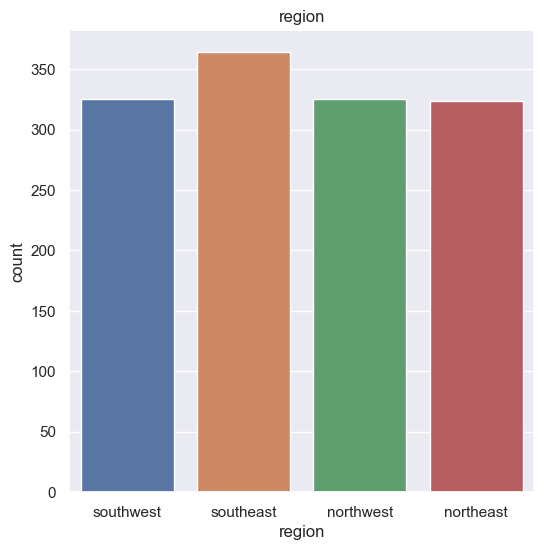

In [124]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data= insurance_dataset)
plt.title('region')
plt.show()

In [125]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Distribution of Charges

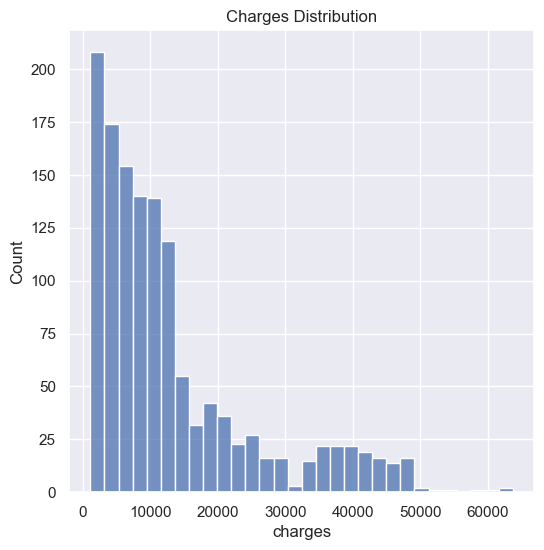

In [126]:
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

# Data Pre-Processing

In [127]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Check Correlation between numeric columns

In [128]:
# Select only the numeric columns
numeric_df = insurance_dataset.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


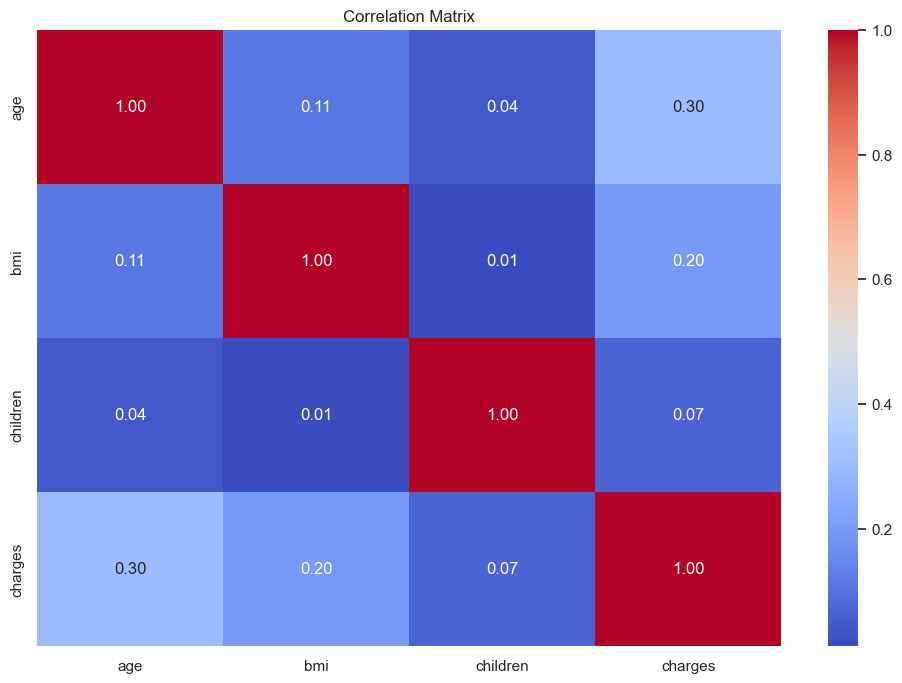

In [129]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

Splitting the features and Target

In [130]:
X= insurance_dataset.drop(columns='charges',axis=1)
y= insurance_dataset['charges']

In [131]:
X,y

(      age     sex     bmi  children smoker     region
 0      19  female  27.900         0    yes  southwest
 1      18    male  33.770         1     no  southeast
 2      28    male  33.000         3     no  southeast
 3      33    male  22.705         0     no  northwest
 4      32    male  28.880         0     no  northwest
 ...   ...     ...     ...       ...    ...        ...
 1333   50    male  30.970         3     no  northwest
 1334   18  female  31.920         0     no  northeast
 1335   18  female  36.850         0     no  southeast
 1336   21  female  25.800         0     no  southwest
 1337   61  female  29.070         0    yes  northwest
 
 [1338 rows x 6 columns],
 0       16884.92400
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
            ...     
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 1337    29141.36030
 Name: charges, Length: 1338, dtype: float64)

In [132]:
X_train, X_test,y_train,y_test = train_test_split (X, y, test_size=0.2, random_state=2)

In [133]:
X.shape, X_train.shape, X_test.shape

((1338, 6), (1070, 6), (268, 6))

In [134]:
y.shape, y_train.shape, y_test.shape

((1338,), (1070,), (268,))

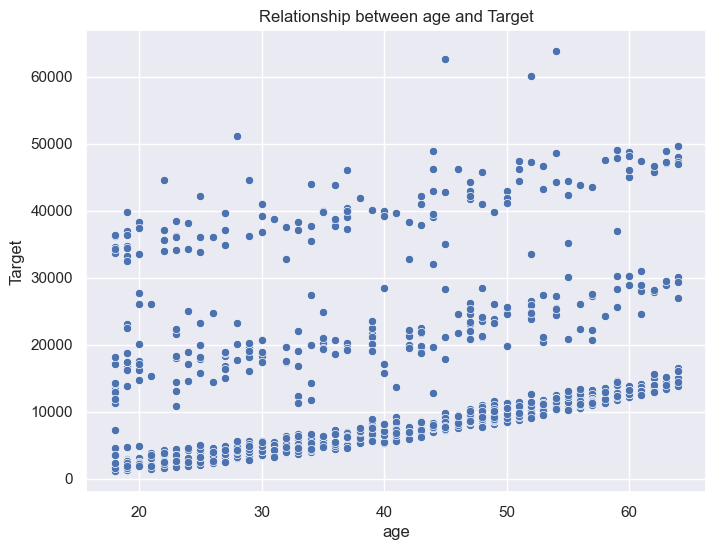

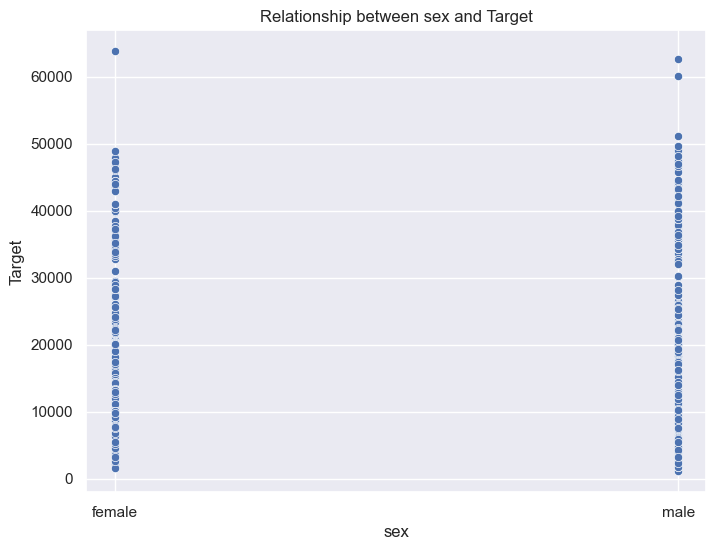

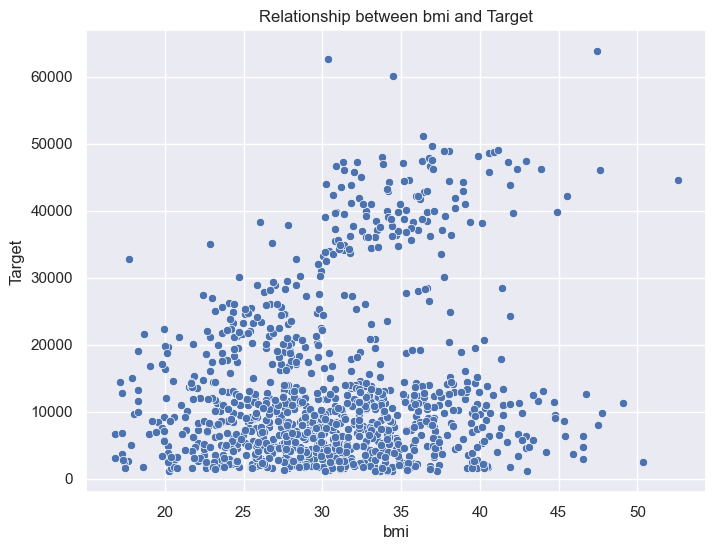

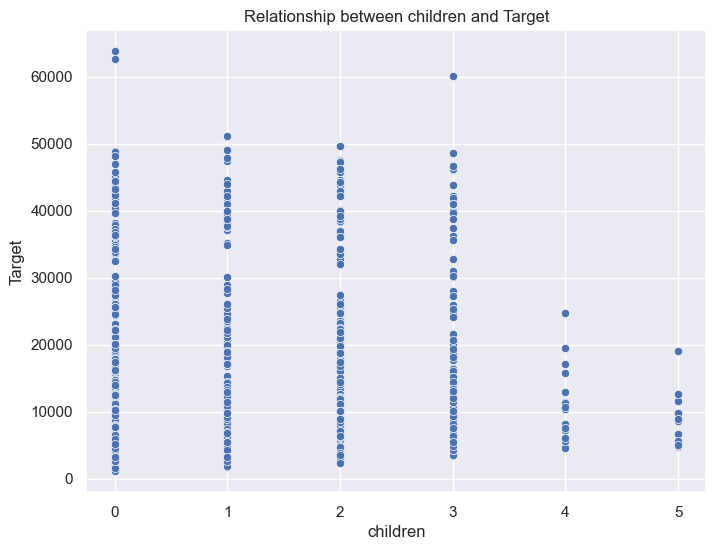

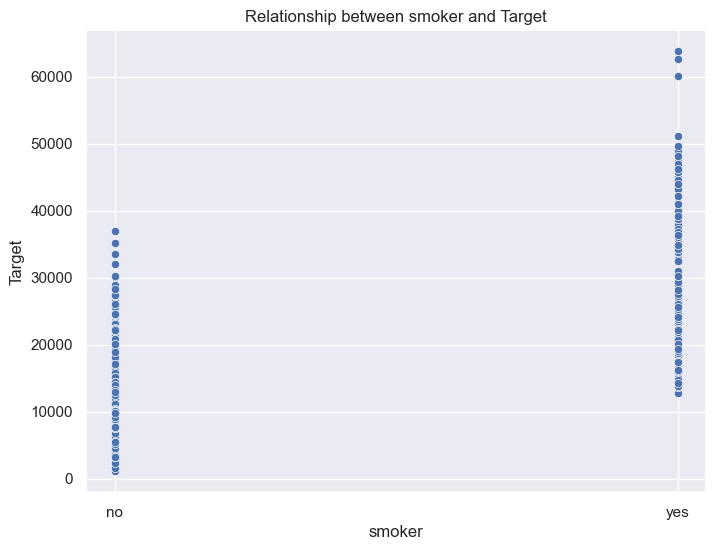

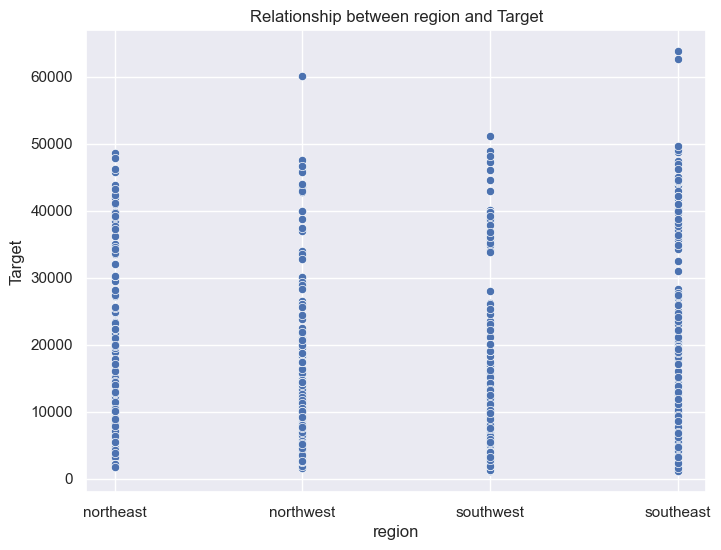

In [135]:
# Relation between Input and Output feature
def plot_input_vs_output(X, y):
    # Loop through all features in X
    for feature in X.columns:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=X[feature], y=y)
        plt.title(f'Relationship between {feature} and Target')
        plt.xlabel(feature)
        plt.ylabel('Target')
        plt.show()

# Call the function to plot the graphs
plot_input_vs_output(X_train, y_train)

In [136]:
# Encoding
trf1= ColumnTransformer([
    ('ohe_sex_smoker_region', OneHotEncoder(sparse_output=False, handle_unknown='ignore'),[1,4,5])
],remainder='passthrough')

In [137]:
#feature scaling
trf2= ColumnTransformer([
    ('scale',StandardScaler(),slice(0,11))
])

In [138]:
# List of ensemble models
models = {
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=2),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=2),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=2),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=2)
}

In [139]:
# Dictionary to store R² scores for train and test data
r2_scores_train = {}
r2_scores_test = {}

In [140]:
for model_name, model in models.items():
    # Create the pipeline for each model
    pipe = Pipeline([
        ('trf1', trf1),
        ('trf2', trf2),
        ('model', model)
    ])
    
    # Train the model
    pipe.fit(X_train, y_train)
    
    # Predict on training data and evaluate
    y_train_pred = pipe.predict(X_train)
    r2_train = r2_score(y_train, y_train_pred)
    r2_scores_train[model_name] = r2_train
    
    # Predict on test data and evaluate
    y_test_pred = pipe.predict(X_test)
    r2_test = r2_score(y_test, y_test_pred)
    r2_scores_test[model_name] = r2_test
    
    # Print the results for both train and test data
    print(f'{model_name}:')
    print(f'   R² score on training data: {r2_train:.4f}')
    print(f'   R² score on test data: {r2_test:.4f}')

RandomForest:
   R² score on training data: 0.9778
   R² score on test data: 0.8405
GradientBoosting:
   R² score on training data: 0.9045
   R² score on test data: 0.8688
XGBoost:
   R² score on training data: 0.9967
   R² score on test data: 0.8181
AdaBoost:
   R² score on training data: 0.8415
   R² score on test data: 0.8320


In [141]:
# Using GridSearchCV to tune hyperparameters for Gradient Boosting
param_grid = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.01,0.05, 0.1],
    'model__max_depth': [3, 5],
    'model__min_samples_split': [5, 10],
    'model__min_samples_leaf': [4, 6],
    'model__subsample': [0.8, 1.0]
}

In [142]:
# Final Preprocessing pipeline
final_pipe = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('model', GradientBoostingRegressor(random_state=2, alpha=0.9))
])

In [143]:
grid_search = GridSearchCV(final_pipe, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe_sex_smoker_region',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         [1, 4,
                                                                          5])])),
                                       ('trf2',
                                        ColumnTransformer(transformers=[('scale',
                                                                         StandardScaler(),
                                                                         slice(0, 11, None))])),
                                       ('model',
                                        GradientBoostingRegressor(random_state=2))]),
             param_grid={'model__learning_rate': [0.01, 0.05, 0.1],
                         'model__max_depth': [3, 5],
                         'model__min_samples_leaf': [4, 6],
                         'model__min_samples_split': [5, 10],
                         'model__n_estimators': [100, 200],
                         'model__subsample': [0.8, 1.0]},
             scoring='r2')

In [144]:
# Best parameters and best model
print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

Best parameters: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__min_samples_leaf': 6, 'model__min_samples_split': 5, 'model__n_estimators': 100, 'model__subsample': 0.8}


In [145]:
# Evaluate the final model performance
y_train_pred_final = best_model.predict(X_train)
y_test_pred_final = best_model.predict(X_test)

In [146]:
final_train_r2 = r2_score(y_train, y_train_pred_final)
final_test_r2 = r2_score(y_test, y_test_pred_final)
print(f"Final Gradient Boosting Model:")
print(f"R² score on training data: {final_train_r2:.4f}")
print(f"R² score on test data: {final_test_r2:.4f}")

Final Gradient Boosting Model:
R² score on training data: 0.8827
R² score on test data: 0.8717


In [104]:
# Cross-validation score
cv_scores = cross_val_score(best_model, X_train, y_train, cv=10, scoring='r2')
print(f"Cross-validated R² score: {cv_scores.mean():.4f}")

Cross-validated R² score: 0.8485


# Exporting the Pipeline

In [65]:
#export
import pickle
pickle.dump(pipe,open('pipe1.pkl','wb'))